In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [34]:
rng = numpy.random

learning_rate = 0.01
training_epochs = 1000
display_step = 100

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] 

In [21]:
# 변수 설정

X = tf.placeholder('float32')
Y = tf.placeholder('float32')
W = tf.Variable(rng.randn(), name = 'weight')
b = tf.Variable(rng.randn(), name = 'bias')

In [23]:
# model
pred = tf.add(tf.multiply(X, W), b) # w 값이 하나라  multiply (행렬일땐 matmul)

#cost function
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #chaining .로 다 붙임

# 초기화
init = tf.global_variables_initializer()

Epoch: 100
 cost=  0.138928 w= 0.6431001 b= -0.20005238
Epoch: 200
 cost=  0.125435 w= 0.6431001 b= -0.08446469
Epoch: 300
 cost=  0.114879 w= 0.6431001 b= 0.017782621
Epoch: 400
 cost=  0.106622 w= 0.6431001 b= 0.10822948
Epoch: 500
 cost=  0.100162 w= 0.6431001 b= 0.18823767
Epoch: 600
 cost=  0.095109 w= 0.6431001 b= 0.25901154
Epoch: 700
 cost=  0.091157 w= 0.6431001 b= 0.321618
Epoch: 800
 cost=  0.088066 w= 0.6431001 b= 0.37699866
Epoch: 900
 cost=  0.085648 w= 0.6431001 b= 0.42598748
Epoch: 1000
 cost=  0.083757 w= 0.6431001 b= 0.46932253
최적화 종료!


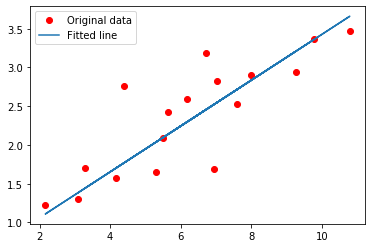

In [39]:
# 모델 구현

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):  # 1:1 매칭해서, 튜플 형식으로 반환 
            sess.run(optimizer, feed_dict = {X:x, Y:y})
            
        if (epoch +1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print('Epoch:', '%d'%(epoch+1)+'\n', 'cost=','{:9f}'.format(c), 'w=', sess.run(w), 'b=', sess.run(b))
                
    print('/n최적화 종료!')
    training_cost = sess.run(cost, feed_dict = {X:train_X, Y : train_Y})
    
    # 회귀선 출력 y = ax + b
    plt.plot(train_X, train_Y, 'ro', label ='Original data')
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label ='Fitted line')
    plt.legend()
    plt.show()


In [40]:
training_cost

0.08375691